In [125]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from scipy import stats

# Load the datasets
file1_path = 'educ_data.csv'
file2_path = 'gini_data.csv'
file3_path = 'unemp_data.csv'
file4_path = 'gdppc_data.csv'
file5_path = 'oecd_gini_data.csv'
file6_path = 'world_bank_data.csv'
file7_path = 'world_bank_data_2.csv'

educ_df = pd.read_csv(file1_path)
gini_df = pd.read_csv(file2_path)
unemp_df = pd.read_csv(file3_path)
gdppc_df = pd.read_csv(file4_path)
gini_oecd_df = pd.read_csv(file5_path)
world_bank_df = pd.read_csv(file6_path)
world_bank_2_df = pd.read_csv(file7_path)

In [126]:
year_columns = [str(year) + ' [YR' + str(year) + ']' for year in range(1960, 2024)]

# Cleaning up world bank dataset 1
world_bank_melted_df = world_bank_df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)
# Drop rows with no data
world_bank_melted_df = world_bank_melted_df[world_bank_melted_df['Value'] != '..']

# Convert 'Year' to a numerical type if needed (strip out the text around it, like 'YR1960' to just '1960')
world_bank_melted_df['Year'] = world_bank_melted_df['Year'].str.extract('(\d+)').astype(int)
world_bank_melted_df['Value'] = pd.to_numeric(world_bank_melted_df['Value'], errors='coerce')

# Pivot the DataFrame without dropping the Year column
world_bank_pivot_df = world_bank_melted_df.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                                                 columns='Series Name', 
                                                 values='Value', 
                                                 fill_value=0).reset_index()

# Rename selected columns
world_bank_pivot_df.rename(columns={
    "Population living in slums (% of urban population)": "Slum Population (%)",
    "High-technology exports (% of manufactured exports)": "High-tech Exports (%)",
    "Political Stability and Absence of Violence/Terrorism: Estimate": "Pol Stability",
    "Individuals using the Internet (% of population)": "Internet Use (%)",
    "Government Effectiveness: Estimate": "Govt Eff",
    "Control of Corruption: Estimate": "Control Corr",
    "Social contributions (current LCU)": "Soc Cont",
    "Share of youth not in education, employment or training, total (% of youth population)": "Unproductive Youth (%)"
}, inplace=True)

# Cleaning up world bank dataset 2
world_bank_2_melted_df = world_bank_2_df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)
# Drop rows with no data
world_bank_2_melted_df = world_bank_2_melted_df[world_bank_2_melted_df['Value'] != '..']

# Convert 'Year' to a numerical type if needed (strip out the text around it, like 'YR1960' to just '1960')
world_bank_2_melted_df['Year'] = world_bank_2_melted_df['Year'].str.extract('(\d+)').astype(int)
world_bank_2_melted_df['Value'] = pd.to_numeric(world_bank_2_melted_df['Value'], errors='coerce')

# Pivot the DataFrame without dropping the Year column
world_bank_2_pivot_df = world_bank_2_melted_df.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                                                 columns='Series Name', 
                                                 values='Value', 
                                                 fill_value=0).reset_index()

# Rename selected columns
world_bank_2_pivot_df.rename(columns={
    "Gross domestic savings (% of GDP)": "Domestic Savings (%)",
    "Fertility rate, total (births per woman)": "Fertility Rate",
    "Wanted fertility rate (births per woman)": "Wanted Fertility Rate",
    "Poverty gap at $2.15 a day (2017 PPP) (%)": "Poverty Gap ($2.15) (%)",
    "Poverty gap at $3.65 a day (2017 PPP) (%)": "Poverty Gap ($3.65) (%)",
    "Poverty gap at $6.85 a day (2017 PPP) (%)": "Poverty Gap ($6.85) (%)"
}, inplace=True)

# Extract columns of interest to be merged
columns_of_interest_1 = [
    "Country Name",
    "Country Code",
    "Year",
    "Slum Population (%)",
    "High-tech Exports (%)",
    "Pol Stability",
    "Internet Use (%)",
    "Govt Eff",
    "Control Corr",
    "Soc Cont",
    "Unproductive Youth (%)"
]

columns_of_interest_2 = [
    "Country Name",
    "Country Code",
    "Year",
    "Domestic Savings (%)",
    "Fertility Rate",
    "Wanted Fertility Rate",
    "Poverty Gap ($2.15) (%)",
    "Poverty Gap ($3.65) (%)",
    "Poverty Gap ($6.85) (%)"
]

world_bank_subset_df = world_bank_pivot_df[columns_of_interest_1]
world_bank_2_subset_df = world_bank_2_pivot_df[columns_of_interest_2]

"""world_bank_subset_df = world_bank_subset_df[
    (world_bank_subset_df['Year'] >= 1991) & 
    (world_bank_subset_df['Year'] <= 2024)
]

world_bank_2_subset_df = world_bank_2_subset_df[
    (world_bank_2_subset_df['Year'] >= 1991) & 
    (world_bank_2_subset_df['Year'] <= 2024)
]"""

world_bank_subset_df = world_bank_subset_df.dropna()
world_bank_2_subset_df = world_bank_2_subset_df.dropna()

big_world_bank_df = pd.merge(world_bank_subset_df,world_bank_2_subset_df,on=["Country Code","Year"])
big_world_bank_df.head()

Series Name,Country Name_x,Country Code,Year,Slum Population (%),High-tech Exports (%),Pol Stability,Internet Use (%),Govt Eff,Control Corr,Soc Cont,Unproductive Youth (%),Country Name_y,Domestic Savings (%),Fertility Rate,Wanted Fertility Rate,Poverty Gap ($2.15) (%),Poverty Gap ($3.65) (%),Poverty Gap ($6.85) (%)
0,Afghanistan,AFG,1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.282,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.284,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.292,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.302,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.304,0.0,0.0,0.0,0.0


In [127]:
# Clean unemp_df
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']  

year_columns = unemp_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
unemp_df = pd.melt(unemp_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Unemp %')

# Drop rows with no data
unemp_df = unemp_df.dropna(subset=['Unemp %'])

# Convert 'Year' to a numerical type
unemp_df['Year'] = unemp_df['Year'].astype(int)

# Clean educ_df
id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code']  

year_columns = educ_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
educ_df = pd.melt(educ_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Average years of schooling')

# Drop rows with no data
educ_df = educ_df[educ_df['Average years of schooling'] != '..']

# Convert 'Year' to a numerical type and strip out the text around it
educ_df['Year'] = educ_df['Year'].str.extract('(\d+)').astype(int)


# Clean GDP Per capita

id_vars = ['Series Name', 'Series Code', 'Country Name', 'Country Code']  

year_columns = gdppc_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
gdppc_df = pd.melt(gdppc_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='GDPPC')

# Drop rows with no data
gdppc_df = gdppc_df.dropna(subset=['GDPPC'])

# Convert 'Year' to a numerical type and strip out the text around it
gdppc_df['Year'] = gdppc_df['Year'].str.extract('(\d+)').astype(int)

# Clean gini_df

id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']  

year_columns = gini_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
gini_df = pd.melt(gini_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Gini_coefficient')

# Convert 'Year' to a numerical type and strip out the text around it
gini_df['Year'] = gini_df['Year'].astype(int)

# Clean OECD Gini

id_vars = ['Countries']

year_columns = gini_oecd_df.columns[1:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
gini_oecd_df = pd.melt(gini_oecd_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Gini_coefficient')
gini_oecd_df['Gini_coefficient'] = gini_oecd_df['Gini_coefficient']*100

# Drop rows with no data
gini_oecd_df = gini_oecd_df.dropna(subset=['Gini_coefficient'])

# Convert 'Year' to a numerical type and strip out the text around it
gini_oecd_df['Year'] = gini_oecd_df['Year'].astype(int)

# Rename countries column to Country Code for easier merging
gini_oecd_df = gini_oecd_df.rename(columns={'Countries': 'Country Code'})

# Combining gini datasets
merged_gini_df = pd.merge(gini_df, gini_oecd_df[['Country Code', 'Year', 'Gini_coefficient']], 
                     on=['Country Code', 'Year'], 
                     how='outer', 
                     suffixes=('', '_OECD'))

# Combine Gini values, prioritizing the main DataFrame first
merged_gini_df['Gini_coefficient'] = merged_gini_df['Gini_coefficient'].combine_first(merged_gini_df['Gini_coefficient_OECD'])

# Drop the extra OECD Gini column
merged_gini_df = merged_gini_df.drop(columns=['Gini_coefficient_OECD'])

# Forward fill missing values for each country
merged_gini_df['Gini_coefficient'] = merged_gini_df.groupby('Country Code')['Gini_coefficient'].ffill()

# Remove rows that are still missing Gini values, if needed
merged_gini_df = merged_gini_df.dropna(subset=['Gini_coefficient'])

# Check the resulting DataFrame
print(merged_gini_df.head())

       Country Name Country Code Indicator Name Indicator Code  Year  \
1049  United States          USA     Gini index    SI.POV.GINI  1963   
1315  United States          USA     Gini index    SI.POV.GINI  1964   
1581  United States          USA     Gini index    SI.POV.GINI  1965   
1847  United States          USA     Gini index    SI.POV.GINI  1966   
2113  United States          USA     Gini index    SI.POV.GINI  1967   

      Gini_coefficient  
1049              37.6  
1315              38.1  
1581              37.5  
1847              37.8  
2113              36.9  


In [128]:
unemp_df = unemp_df.drop(columns=['Country Name'])
educ_df = educ_df.drop(columns=['Country Name'])
gdppc_df = gdppc_df.drop(columns=['Country Name'])

merged_df = pd.merge(merged_gini_df,unemp_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])
#merged_df = pd.merge(merged_df,educ_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])
merged_df = pd.merge(merged_df, gdppc_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])
merged_df = pd.merge(merged_df,big_world_bank_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])

columns_req = ["Country Code",
                "Year",
                "GDPPC", 
                "Gini_coefficient",
                "Unemp %",
                #'Average years of schooling', 
                "Slum Population (%)",
                "High-tech Exports (%)",
                "Pol Stability",
                "Internet Use (%)",
                "Govt Eff",
                "Control Corr",
                "Soc Cont",
                "Unproductive Youth (%)",
                "Domestic Savings (%)",
                "Fertility Rate",
                "Wanted Fertility Rate",
                "Poverty Gap ($2.15) (%)",
                "Poverty Gap ($3.65) (%)",
                "Poverty Gap ($6.85) (%)"
            ]

columns_numeric = ["Year",
                    "GDPPC", 
                    "Gini_coefficient",
                    "Unemp %",
                    #'Average years of schooling', 
                    "Slum Population (%)",
                    "High-tech Exports (%)",
                    "Pol Stability",
                    "Internet Use (%)",
                    "Govt Eff",
                    "Control Corr",
                    "Soc Cont",
                    "Unproductive Youth (%)",
                    "Domestic Savings (%)",
                    "Fertility Rate",
                    "Wanted Fertility Rate",
                    "Poverty Gap ($2.15) (%)",
                    "Poverty Gap ($3.65) (%)",
                    "Poverty Gap ($6.85) (%)"
            ]

merged_df = merged_df[columns_req]

for col in columns_numeric:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Creating dummies for HDI level
very_high_hdi_countries = [
    "CHE", "NOR", "ISL", "HKG", "DNK", "SWE", "DEU", "IRL", "SGP", "AUS", 
    "NLD", "BEL", "FIN", "LIE", "GBR", "NZL", "ARE", "CAN", "KOR", "LUX", 
    "USA", "AUT", "SVN", "JPN", "ISR", "MLT", "ESP", "FRA", "CYP", "ITA", 
    "EST", "CZE", "GRC", "BHR", "AND", "POL", "LVA", "LTU", "HRV", 
    "QAT", "SAU", "PRT", "SMR", "CHL", "SVK", "TUR", "HUN", "ARG", 
    "KWT", "MNE", "KNA", "URY", "ROU", "ATG", "BRN", "RUS", "BHS", 
    "PAN", "OMN", "GEO", "TTO", "BRB", "MYS", "CRI", "SRB", "THA", 
    "KAZ", "SYC", "BLR"
]


high_hdi_countries = [
    "BGR", "PLW", "MUS", "GRD", "ALB", "CHN", "ARM", "MEX", "IRN", "LKA", 
    "BIH", "VCT", "DOM", "ECU", "MKD", "CUB", "MDA", "MDV", "PER", 
    "AZE", "BRA", "COL", "LBY", "DZA", "TKM", "GUY", "MNG", "DMA", 
    "TON", "JOR", "UKR", "TUN", "MHL", "PRY", "FJI", "EGY", "UZB", 
    "VNM", "LCA", "LBN", "ZAF", "PSE", "IDN", "PHL", "BWA", "JAM", 
    "WSM", "KGZ", "BLZ"
]

medium_hdi_countries = [
    "VEN", "BOL", "MAR", "NRU", "GAB", "SUR", "BTN", "TJK", "SLV", 
    "IRQ", "BGD", "NIC", "CPV", "TUV", "GNQ", "IND", "FSM", "GTM", 
    "KIR", "HND", "LAO", "VUT", "STP", "SWZ", "NAM", "MMR", "GHA", 
    "KEN", "NPL", "KHM", "COG", "AGO", "CMR", "COM", "ZMB", 
    "PNG", "TLS", "SLB", "SYR", "HTI", "UGA", "ZWE"
]

# Low HDI is the baseline; no dummy
# Create the dummy columns for the 4 categories
merged_df['Very High HDI'] = merged_df['Country Code'].apply(lambda x: 1 if x in very_high_hdi_countries else 0)
merged_df['High HDI'] = merged_df['Country Code'].apply(lambda x: 1 if x in high_hdi_countries else 0)
merged_df['Medium HDI'] = merged_df['Country Code'].apply(lambda x: 1 if x in medium_hdi_countries else 0)

# Create year dummies
year_dummies = pd.get_dummies(merged_df['Year'], prefix='Year')
merged_df = pd.concat([merged_df, year_dummies], axis=1)

# Step 2: Drop duplicate rows
merged_df = merged_df.drop_duplicates().reset_index(drop=True)
merged_df = merged_df.set_index(["Country Code","Year"])
merged_df = merged_df.dropna()

merged_df.head()

,,GDPPC,Gini_coefficient,Unemp %,Slum Population (%),High-tech Exports (%),Pol Stability,Internet Use (%),Govt Eff,Control Corr,Soc Cont,...,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023
Country Code,Year,,,,,,,,,,,,,,,,,,,,,
ARG,1991,5730.723810,46.8,5.440,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
AUS,1991,18859.407960,33.2,9.586,0.0,0.0,0.0,1.097204,0.0,0.0,561000000.0,...,False,False,False,False,False,False,False,False,False,False
BEL,1991,21041.660650,25.7,6.984,0.0,0.0,0.0,0.020073,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
BGD,1991,283.382285,27.6,2.200,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
BOL,1991,737.521442,42.0,2.927,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/3942557174.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['Log_GDPPC'] = np.log(gbr_df['GDPPC'])
/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/3942557174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['GDPPC_k'] = gbr_df['GDPPC']/1000 # in thousands
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ve

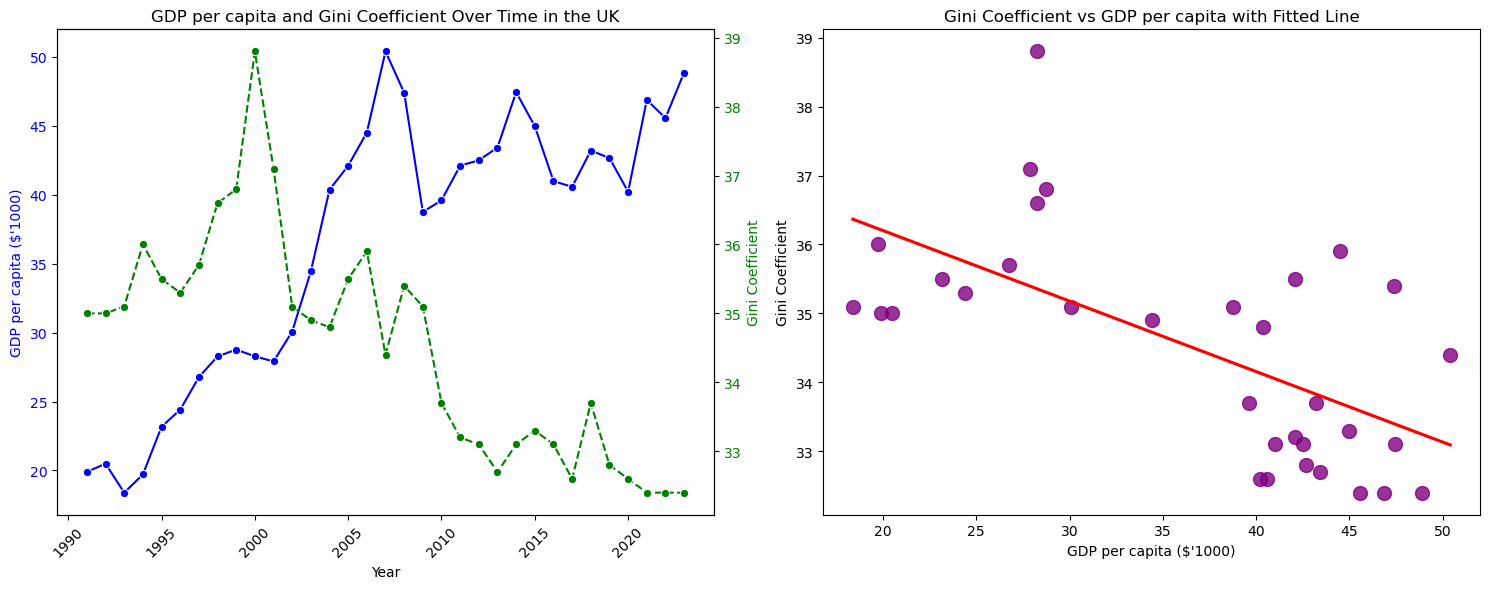

In [129]:
# Isolate data for the UK
gbr_df = merged_df.xs('GBR', level='Country Code')
gbr_df['Log_GDPPC'] = np.log(gbr_df['GDPPC'])
gbr_df['GDPPC_k'] = gbr_df['GDPPC']/1000 # in thousands

# Initialize the figure with a 1x2 subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

# --- First Plot: Double Y-Axis (GDP per capita and Gini coefficient over time) ---

# Plot GDP per capita on the first y-axis
sns.lineplot(data=gbr_df, x="Year", y="GDPPC_k", ax=ax1, color="b", marker="o")
ax1.set_ylabel("GDP per capita ($'1000)", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Create a second y-axis for the Gini coefficient
ax3 = ax1.twinx()
sns.lineplot(data=gbr_df, x="Year", y="Gini_coefficient", ax=ax3, color="g", marker="o", linestyle="--")
ax3.set_ylabel("Gini Coefficient", color="g")
ax3.tick_params(axis="y", labelcolor="g")

# Add a title to the first subplot
ax1.set_title("GDP per capita and Gini Coefficient Over Time in the UK")
ax1.set_xlabel("Year")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# --- Second Plot: Gini Coefficient vs GDP per capita (Scatter Plot) ---

# Plot Gini vs log-transformed GDP with a linear regression line (fitting the curve)
sns.regplot(data=gbr_df, x="GDPPC_k", y="Gini_coefficient", ax=ax2, color="purple", scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)

# Add a title and labels to the second subplot
ax2.set_title("Gini Coefficient vs GDP per capita with Fitted Line")
ax2.set_xlabel("GDP per capita ($'1000)")
ax2.set_ylabel("Gini Coefficient")

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

Isolating just the data from the United Kingdom! Interesting parallel trends of GDP and Gini Index prior to 2002 and seemingly diverging trend after that. Does this suggest that there is an inflection point as predicted by the Kuznet's Curve?

Linear Regression Details:
Slope (Gradient): -0.10227184409620238
Intercept: 38.24667727263653
R-squared: 0.39118716304725093


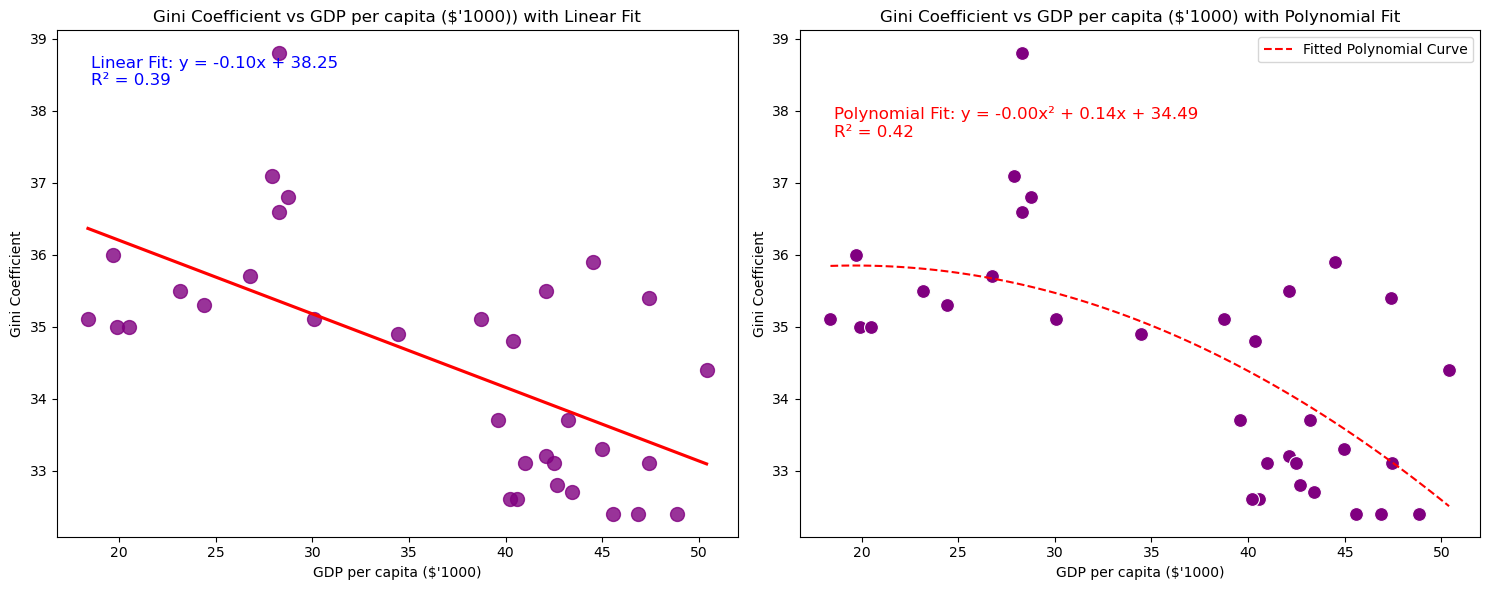

In [133]:
# Initialize the figure with a 1x2 subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

# Perform linear regression to get slope, intercept, and R^2
slope, intercept, r_value, p_value, std_err = stats.linregress(gbr_df['GDPPC_k'], gbr_df['Gini_coefficient'])
r_squared = r_value**2

print("Linear Regression Details:")
print(f"Slope (Gradient): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_squared}")

# Plot Gini vs log-transformed GDP with linear regression line
sns.regplot(data=gbr_df, x="GDPPC_k", y="Gini_coefficient", ax=ax1, color="purple", scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)

# Add a title and labels to the second subplot
ax1.set_title("Gini Coefficient vs GDP per capita ($'1000)) with Linear Fit")
ax1.set_xlabel("GDP per capita ($'1000)")
ax1.set_ylabel("Gini Coefficient")

ax1.text(0.05, 0.95, f"Linear Fit: y = {slope:.2f}x + {intercept:.2f}\nR² = {r_squared:.2f}",
         transform=ax1.transAxes, fontsize=12, verticalalignment='top', color="blue")

# Fit a polynomial of degree 2 (quadratic fit)
p = np.polyfit(gbr_df['GDPPC_k'], gbr_df['Gini_coefficient'], deg=2)
poly = np.poly1d(p)

# Generate points for the fitted polynomial curve
x_vals = np.linspace(gbr_df['GDPPC_k'].min(), gbr_df['GDPPC_k'].max(), 100)
y_vals = poly(x_vals)

# Calculate R^2 (coefficient of determination) for the polynomial fit
y_fit = poly(gbr_df['GDPPC_k'])
residuals = gbr_df['Gini_coefficient'] - y_fit
ss_residual = np.sum(residuals**2)
ss_total = np.sum((gbr_df['Gini_coefficient'] - np.mean(gbr_df['Gini_coefficient']))**2)
r_squared_poly = 1 - (ss_residual / ss_total)

# Plot Gini vs log-transformed GDP with the polynomial curve
sns.scatterplot(data=gbr_df, x="GDPPC_k", y="Gini_coefficient", ax=ax2, color="purple", s=100)
ax2.plot(x_vals, y_vals, color="red", linestyle="--", label="Fitted Polynomial Curve")

# Add a title and labels to the second subplot
ax2.set_title("Gini Coefficient vs GDP per capita ($'1000) with Polynomial Fit")
ax2.set_xlabel("GDP per capita ($'1000)")
ax2.set_ylabel("Gini Coefficient")
ax2.legend()

# Add polynomial fit details to the second plot
ax2.text(0.05, 0.85, f"Polynomial Fit: y = {p[0]:.2f}x² + {p[1]:.2f}x + {p[2]:.2f}\nR² = {r_squared_poly:.2f}",
         transform=ax2.transAxes, fontsize=12, verticalalignment='top', color="red")

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the pl
plt.show()

There does not seem to be very strong evidence of a U-shaped curve, as the estimated coefficient for the $x^2$ term is not significantly different from zero in the quadratic polynomial fitting of the Gini Index versus GDP per capita data in the United Kingdom. Let us confirm this by running a linear regression with a GDP per capita square term.

In [136]:
import statsmodels.api as sm
from linearmodels import PanelOLS

# Add square term
gbr_df['GDPPC_k_sq'] = gbr_df['GDPPC_k']**2
gbr_df['Log_GDPPC_sq'] = gbr_df['Log_GDPPC']**2

# Define the dependent variable
y = gbr_df['Gini_coefficient']
X = gbr_df[['GDPPC_k', 'GDPPC_k_sq']]

# Convert columns to numeric, coerce errors to handle non-numeric data
#X = X.apply(pd.to_numeric, errors='coerce')
#y = pd.to_numeric(y, errors='coerce')

# Combine `y` and `X` for filtering, but do not apply log transformation here
df_cleaned = pd.concat([y, X], axis=1)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini_coefficient   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     10.66
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           0.000317
Time:                        16:31:26   Log-Likelihood:                -53.070
No. Observations:                  33   AIC:                             112.1
Df Residuals:                      30   BIC:                             116.6
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.4883      3.398     10.150      0.0

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/3160306741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['GDPPC_k_sq'] = gbr_df['GDPPC_k']**2
/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/3160306741.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['Log_GDPPC_sq'] = gbr_df['Log_GDPPC']**2


Let's build up the model. Maybe we can add possible transmission mechanisms:
- technological development: proxied by internet use
- political stability: political stability and government effectiveness
- unemployment: unemployment rate

In [138]:
# Create lagged GDP variable (lag 1)
#gbr_df['GDPPC_k_lag'] = gbr_df['GDPPC_k'].shift(1)

# Drop rows with NaN values (due to lagging)
#gbr_df = gbr_df.dropna()

# Let us account for time trend!
gbr_df['Time_trend'] = range(1, len(gbr_df) + 1)

# Define the dependent variable
y = gbr_df['Gini_coefficient']
X = gbr_df[['GDPPC_k', 'Unemp %', 'Pol Stability', 'Internet Use (%)', 'Time_trend']]

# Combine `y` and `X` for filtering, but do not apply log transformation here
df_cleaned = pd.concat([y, X], axis=1)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini_coefficient   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     20.14
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           2.38e-08
Time:                        22:00:48   Log-Likelihood:                -37.772
No. Observations:                  33   AIC:                             87.54
Df Residuals:                      27   BIC:                             96.52
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               39.5150      1.635  

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/613562099.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['Time_trend'] = range(1, len(gbr_df) + 1)


/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/1021053689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_df['GDPPC_k_lag'] = gbr_df['GDPPC_k'].shift(4)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages

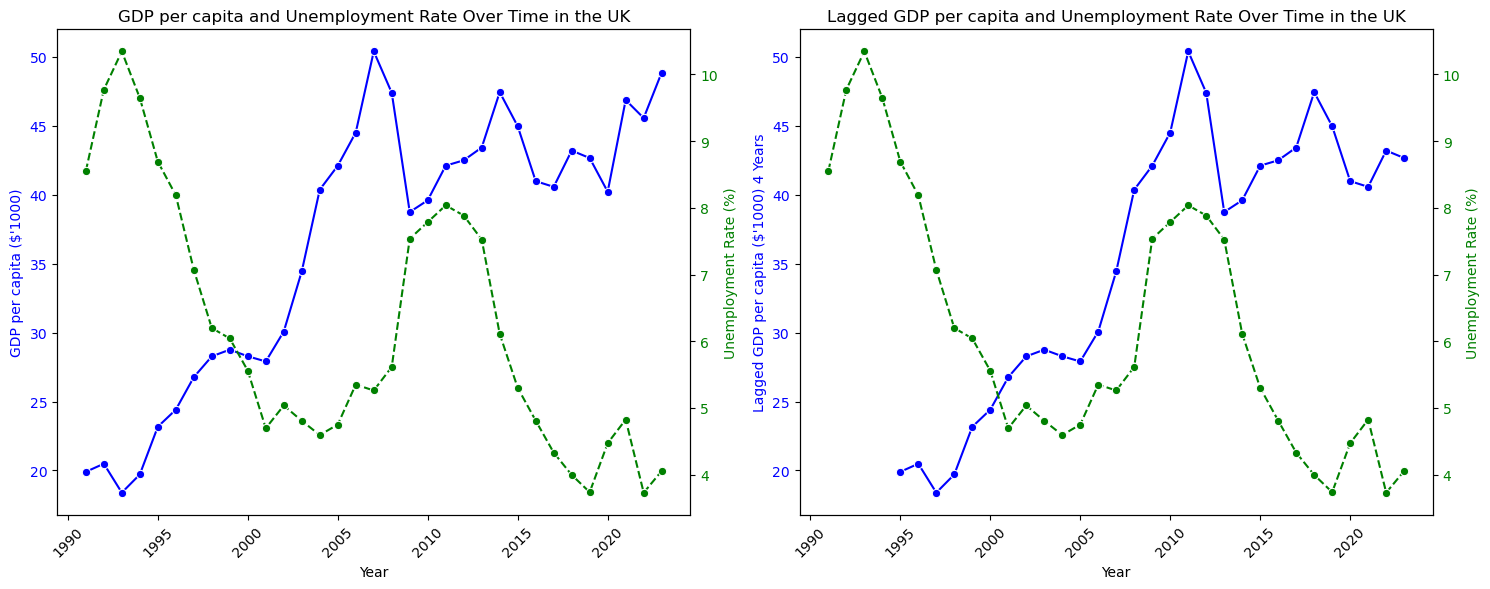

In [142]:
# How does unemployment and GDP change? Unemployment is a lagging indicator of GDP.
# Create lagged GDP variable (lag 1)
gbr_df['GDPPC_k_lag'] = gbr_df['GDPPC_k'].shift(4)

# Initialize the figure with a 1x2 subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

# --- First Plot: Double Y-Axis (GDP per capita and Gini coefficient over time) ---

# Plot GDP per capita on the first y-axis
sns.lineplot(data=gbr_df, x="Year", y="GDPPC_k", ax=ax1, color="b", marker="o")
ax1.set_ylabel("GDP per capita ($'1000)", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Create a second y-axis for the Gini coefficient
ax3 = ax1.twinx()
sns.lineplot(data=gbr_df, x="Year", y="Unemp %", ax=ax3, color="g", marker="o", linestyle="--")
ax3.set_ylabel("Unemployment Rate (%)", color="g")
ax3.tick_params(axis="y", labelcolor="g")

# Add a title to the first subplot
ax1.set_title("GDP per capita and Unemployment Rate Over Time in the UK")
ax1.set_xlabel("Year")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot lagged GDP per capita with unemployment rate on ax2
sns.lineplot(data=gbr_df, x="Year", y="GDPPC_k_lag", ax=ax2, color="b", marker="o")
ax2.set_ylabel("Lagged GDP per capita ($'1000) 4 Years", color="b")
ax2.tick_params(axis="y", labelcolor="b")

# Create a second y-axis for the Unemployment Rate in ax2
ax4 = ax2.twinx()
sns.lineplot(data=gbr_df, x="Year", y="Unemp %", ax=ax4, color="g", marker="o", linestyle="--")
ax4.set_ylabel("Unemployment Rate (%)", color="g")
ax4.tick_params(axis="y", labelcolor="g")

# Add a title to the second subplot
ax2.set_title("Lagged GDP per capita and Unemployment Rate Over Time in the UK")
ax2.set_xlabel("Year")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create dataframe with only independent variables
column_names = ["GDPPC_k",
                "GDPPC_k_lag", 
            "Unemp %",
                #'Average years of schooling', 
                "Slum Population (%)",
                "High-tech Exports (%)",
                "Pol Stability",
                "Internet Use (%)",
                "Govt Eff",
                "Control Corr",
                "Soc Cont",
                "Unproductive Youth (%)",
                "Domestic Savings (%)",
                "Fertility Rate",
                "Wanted Fertility Rate",
                "Poverty Gap ($2.15) (%)",
                "Poverty Gap ($3.65) (%)",
                "Poverty Gap ($6.85) (%)"
            ]
                    
X_vif = gbr_df[column_names]
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)

                   Variable          VIF
0                     const  4646.971731
1                   GDPPC_k     8.811518
2               GDPPC_k_lag     8.573922
3                   Unemp %     8.402329
4       Slum Population (%)          NaN
5     High-tech Exports (%)    10.248407
6             Pol Stability     8.381590
7          Internet Use (%)    55.410222
8                  Govt Eff   118.414110
9              Control Corr   105.527663
10                 Soc Cont    39.307857
11   Unproductive Youth (%)     6.074657
12     Domestic Savings (%)    15.635557
13           Fertility Rate     9.196144
14    Wanted Fertility Rate          NaN
15  Poverty Gap ($2.15) (%)    14.922541
16  Poverty Gap ($3.65) (%)    10.978810
17  Poverty Gap ($6.85) (%)    12.293663


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Try a different country, perhaps Turkiye, which became a high HDI country only in 2015.

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/201790814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Log_GDPPC'] = np.log(country_df['GDPPC'])
/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/201790814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDPPC_k'] = country_df['GDPPC']/1000 # in thousands
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed 

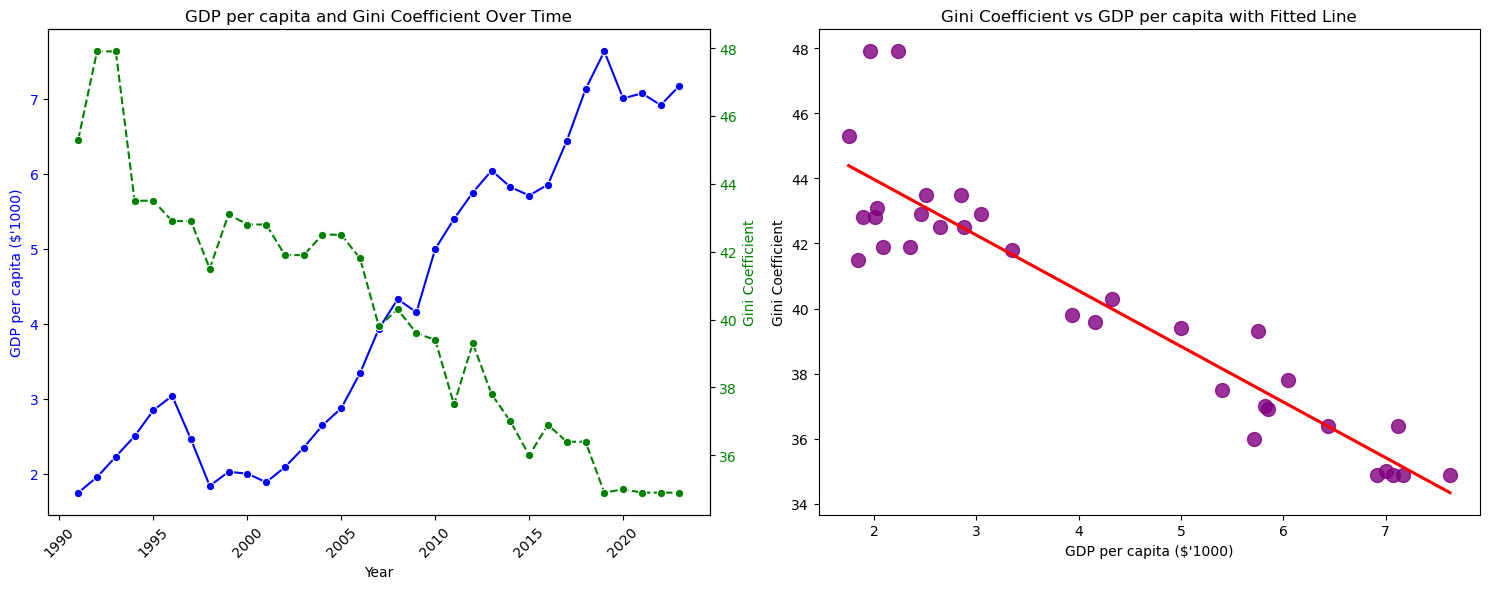

In [117]:
country_df = merged_df.xs('THA', level='Country Code')
country_df['Log_GDPPC'] = np.log(country_df['GDPPC'])
country_df['GDPPC_k'] = country_df['GDPPC']/1000 # in thousands

# Initialize the figure with a 1x2 subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

# --- First Plot: Double Y-Axis (GDP per capita and Gini coefficient over time) ---

# Plot GDP per capita on the first y-axis
sns.lineplot(data=country_df, x="Year", y="GDPPC_k", ax=ax1, color="b", marker="o")
ax1.set_ylabel("GDP per capita ($'1000)", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Create a second y-axis for the Gini coefficient
ax3 = ax1.twinx()
sns.lineplot(data=country_df, x="Year", y="Gini_coefficient", ax=ax3, color="g", marker="o", linestyle="--")
ax3.set_ylabel("Gini Coefficient", color="g")
ax3.tick_params(axis="y", labelcolor="g")

# Add a title to the first subplot
ax1.set_title("GDP per capita and Gini Coefficient Over Time")
ax1.set_xlabel("Year")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# --- Second Plot: Gini Coefficient vs GDP per capita (Scatter Plot) ---

# Plot Gini vs log-transformed GDP with a linear regression line (fitting the curve)
sns.regplot(data=country_df, x="GDPPC_k", y="Gini_coefficient", ax=ax2, color="purple", scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)

# Add a title and labels to the second subplot
ax2.set_title("Gini Coefficient vs GDP per capita with Fitted Line")
ax2.set_xlabel("GDP per capita ($'1000)")
ax2.set_ylabel("Gini Coefficient")

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

In [118]:
# Add square term
country_df['GDPPC_k_sq'] = country_df['GDPPC_k']**2
country_df['Log_GDPPC_sq'] = country_df['Log_GDPPC']**2

# Define the dependent variable
y = country_df['Gini_coefficient']
X = country_df[['GDPPC_k', 'GDPPC_k_sq']]

# Convert columns to numeric, coerce errors to handle non-numeric data
#X = X.apply(pd.to_numeric, errors='coerce')
#y = pd.to_numeric(y, errors='coerce')

# Combine `y` and `X` for filtering, but do not apply log transformation here
df_cleaned = pd.concat([y, X], axis=1)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini_coefficient   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     143.1
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           4.54e-16
Time:                        23:55:46   Log-Likelihood:                -57.933
No. Observations:                  33   AIC:                             121.9
Df Residuals:                      30   BIC:                             126.4
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.5300      2.054     23.141      0.0

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/2059453457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDPPC_k_sq'] = country_df['GDPPC_k']**2
/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/2059453457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Log_GDPPC_sq'] = country_df['Log_GDPPC']**2


OMG THATS SO much difference between countries...

In [139]:
# Create lagged GDP variable (lag 1)
#country_df['GDPPC_k_lag'] = country_df['GDPPC_k'].shift(1)

# Drop rows with NaN values (due to lagging)
#country_df = country_df.dropna()

# Let us account for time trend!
country_df['Time_trend'] = range(1, len(country_df) + 1)

# Define the dependent variable
y = country_df['Gini_coefficient']
X = country_df[['GDPPC_k', 'Unemp %', 'Pol Stability', 'Internet Use (%)', 'Time_trend']]

# Combine `y` and `X` for filtering, but do not apply log transformation here
df_cleaned = pd.concat([y, X], axis=1)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini_coefficient   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           6.17e-17
Time:                        22:02:13   Log-Likelihood:                -40.678
No. Observations:                  33   AIC:                             93.36
Df Residuals:                      27   BIC:                             102.3
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               49.8646      1.644  

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/1948697256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Time_trend'] = range(1, len(country_df) + 1)


/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/2671807856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Log_GDPPC'] = np.log(country_df['GDPPC'])
/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/2671807856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDPPC_k'] = country_df['GDPPC']/1000 # in thousands
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remove

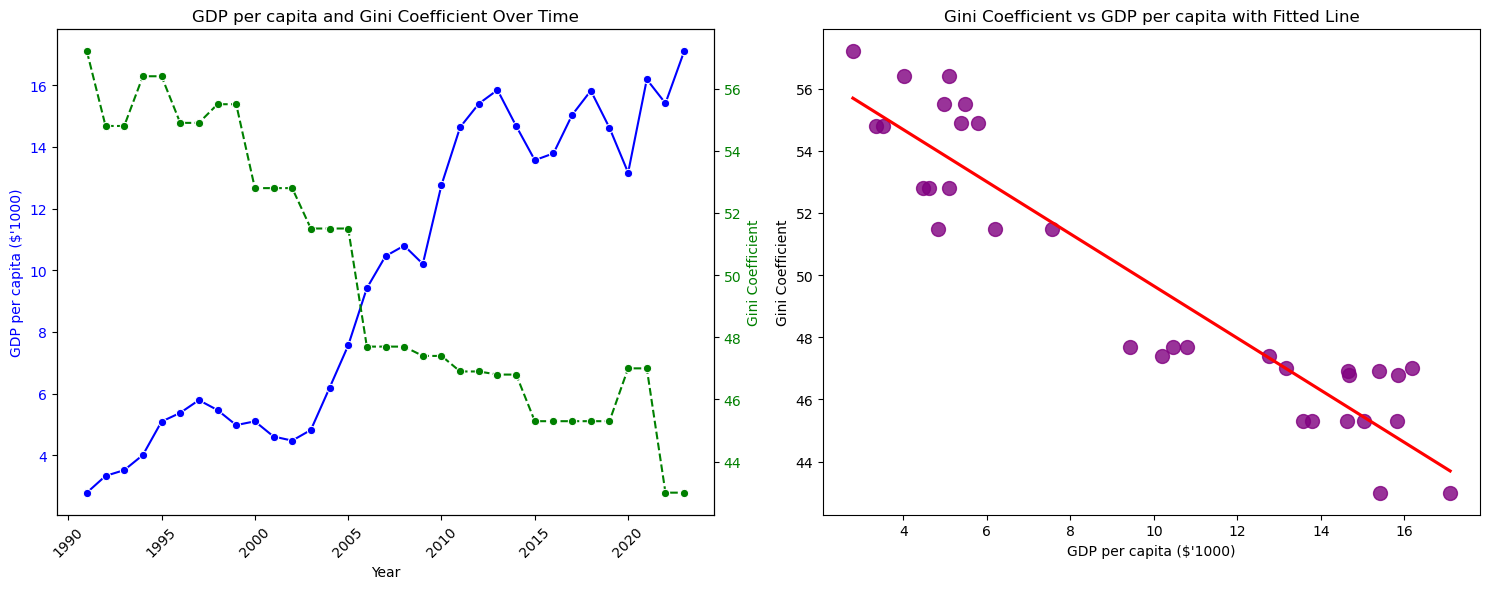

In [143]:
country_df = merged_df.xs('CHL', level='Country Code')
country_df['Log_GDPPC'] = np.log(country_df['GDPPC'])
country_df['GDPPC_k'] = country_df['GDPPC']/1000 # in thousands

# Initialize the figure with a 1x2 subplot layout (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), nrows=1, ncols=2)

# --- First Plot: Double Y-Axis (GDP per capita and Gini coefficient over time) ---

# Plot GDP per capita on the first y-axis
sns.lineplot(data=country_df, x="Year", y="GDPPC_k", ax=ax1, color="b", marker="o")
ax1.set_ylabel("GDP per capita ($'1000)", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Create a second y-axis for the Gini coefficient
ax3 = ax1.twinx()
sns.lineplot(data=country_df, x="Year", y="Gini_coefficient", ax=ax3, color="g", marker="o", linestyle="--")
ax3.set_ylabel("Gini Coefficient", color="g")
ax3.tick_params(axis="y", labelcolor="g")

# Add a title to the first subplot
ax1.set_title("GDP per capita and Gini Coefficient Over Time")
ax1.set_xlabel("Year")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# --- Second Plot: Gini Coefficient vs GDP per capita (Scatter Plot) ---

# Plot Gini vs log-transformed GDP with a linear regression line (fitting the curve)
sns.regplot(data=country_df, x="GDPPC_k", y="Gini_coefficient", ax=ax2, color="purple", scatter_kws={'s': 100}, line_kws={'color': 'red'}, ci=None)

# Add a title and labels to the second subplot
ax2.set_title("Gini Coefficient vs GDP per capita with Fitted Line")
ax2.set_xlabel("GDP per capita ($'1000)")
ax2.set_ylabel("Gini Coefficient")

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

In [144]:
# Add square term
country_df['GDPPC_k_sq'] = country_df['GDPPC_k']**2
country_df['Log_GDPPC_sq'] = country_df['Log_GDPPC']**2

# Define the dependent variable
y = country_df['Gini_coefficient']
X = country_df[['GDPPC_k', 'GDPPC_k_sq']]

# Convert columns to numeric, coerce errors to handle non-numeric data
#X = X.apply(pd.to_numeric, errors='coerce')
#y = pd.to_numeric(y, errors='coerce')

# Combine `y` and `X` for filtering, but do not apply log transformation here
df_cleaned = pd.concat([y, X], axis=1)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini_coefficient   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     128.5
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.93e-15
Time:                        22:54:44   Log-Likelihood:                -58.186
No. Observations:                  33   AIC:                             122.4
Df Residuals:                      30   BIC:                             126.9
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.1159      1.387     44.051      0.0

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/2059453457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['GDPPC_k_sq'] = country_df['GDPPC_k']**2
/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/2059453457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Log_GDPPC_sq'] = country_df['Log_GDPPC']**2


In [145]:
# Create lagged GDP variable (lag 1)
#country_df['GDPPC_k_lag'] = country_df['GDPPC_k'].shift(1)

# Drop rows with NaN values (due to lagging)
#country_df = country_df.dropna()

# Let us account for time trend!
country_df['Time_trend'] = range(1, len(country_df) + 1)

# Define the dependent variable
y = country_df['Gini_coefficient']
X = country_df[['GDPPC_k', 'Unemp %', 'Pol Stability', 'Internet Use (%)', 'Time_trend']]

# Combine `y` and `X` for filtering, but do not apply log transformation here
df_cleaned = pd.concat([y, X], axis=1)

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit(cov_type='HC3')

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Gini_coefficient   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     76.72
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           4.27e-15
Time:                        22:55:05   Log-Likelihood:                -50.029
No. Observations:                  33   AIC:                             112.1
Df Residuals:                      27   BIC:                             121.0
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               57.7987      1.695  

/var/folders/7l/ntl6mjqj6cx_97rnb845mfs40000gn/T/ipykernel_90986/1948697256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_df['Time_trend'] = range(1, len(country_df) + 1)
